In [1]:
algorithm_name = "hogwild"
data_string = "10k-1k"
sparsities = ["0005", "0010", "0200", "1000"]
max_num_cores = 32
problem_type = "linearregression"
regressionclassification_string = "r"

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
def get_dirname(sparsity_string):
    return "%s_%s_%s-%s-%s" % (algorithm_name, problem_type, data_string, \
                               sparsity_string, regressionclassification_string)

### Execution Time vs. Number of Cores, for various Sparsities

In [6]:
def get_execution_time_for_cores(num_cores, sparsity):
    filename = get_dirname(sparsity) + "/" + "threadstats_%dthread.csv" % num_cores
    real_time = -1.0
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        header_row = next(csv_reader)
        main_row = next(csv_reader)
        real_time = float(main_row[1])
    return real_time

def get_execution_times(maximum_num_cores, sparsity):
    result = []
    for n in range(1, maximum_num_cores):
        result.append(get_execution_time_for_cores(n, sparsity))
    return result

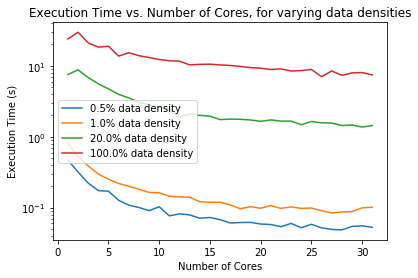

In [27]:
plt.figure(figsize=(6,4))

for sparsity in sparsities:
    exe_time_vs_cores = get_execution_times(max_num_cores, sparsity)
    f_sparsity = float(sparsity) / 10.0
    plt.plot(range(1, max_num_cores), exe_time_vs_cores, label="%.1f%% data density" % f_sparsity)

plt.xlabel('Number of Cores')
plt.ylabel('Execution Time (s)')
plt.yscale('log')
plt.title('Execution Time vs. Number of Cores, for varying data densities')
plt.legend()
plt.show()

### Speedup vs. Number of Cores, for various sparsities

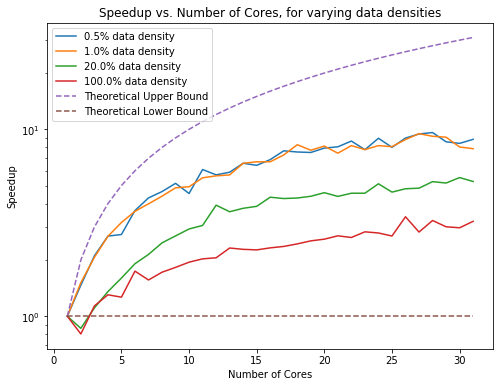

In [63]:
plt.figure(figsize=(8,6))
num_cores = range(1, max_num_cores)

for sparsity in sparsities:
    exe_time_vs_cores = get_execution_times(max_num_cores, sparsity)
    speedup_vs_cores = [exe_time_vs_cores[0] / t for t in exe_time_vs_cores]
    f_sparsity = float(sparsity) / 10.0
    plt.plot(num_cores, speedup_vs_cores, label="%.1f%% data density" % f_sparsity)

plt.plot(num_cores, num_cores, label="Theoretical Upper Bound", linestyle='dashed')
plt.plot(num_cores, np.ones(len(num_cores)), label="Theoretical Lower Bound", linestyle='dashed')
    
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.yscale('log')
plt.title('Speedup vs. Number of Cores, for varying data densities')
plt.legend()
plt.show()